In [44]:
import pandas as pd
from pandas import ExcelWriter
%matplotlib inline

In [45]:
from datetime import datetime 
import time 

btc_df = pd.read_csv('../data/BTC/BTC_2012-2018_1min.csv')
btc_df["Date"] = pd.to_datetime(btc_df["Timestamp"], unit='s')

google_trends_df = pd.read_csv('C:/Users/Shoya/surf/data/Google_Trends_pt1.csv', encoding='latin1')
google_trends_df["date"] = pd.to_datetime(google_trends_df["date"])
google_trends_df["Timestamp"] = [time.mktime(t.timetuple()) for t in google_trends_df.date]
#there's probably some regional time error here (look few cells down)


display(btc_df.head())
display(btc_df.tail())
display(google_trends_df.head())
display(google_trends_df.tail())

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00
1,1325317980,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:53:00
2,1325318040,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:54:00
3,1325318100,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:55:00
4,1325318160,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:56:00


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date
3273372,1522108560,8159.21,8159.39,8153.62,8153.68,0.663192,5408.215377,8154.826880,2018-03-26 23:56:00
3273373,1522108620,8159.38,8163.72,8152.81,8155.00,3.720024,30333.753144,8154.182788,2018-03-26 23:57:00
3273374,1522108680,8157.47,8158.60,8130.01,8130.01,27.294436,222388.761970,8147.769162,2018-03-26 23:58:00
3273375,1522108740,8145.17,8149.66,8130.01,8149.66,23.065281,187570.784940,8132.169837,2018-03-26 23:59:00
3273376,1522108800,8152.26,8164.68,8151.37,8153.04,17.758130,144820.147410,8155.146220,2018-03-27 00:00:00


,date,Bitcoin,Ethereum,Ripple,Buy Bitcoin,Coinbase,isPartial,Timestamp
0,2015-01-06 00:00:00,79,1,11,2,2,False,1.420520e+09
1,2015-01-06 01:00:00,63,1,11,2,2,False,1.420524e+09
2,2015-01-06 02:00:00,67,1,14,2,2,False,1.420528e+09
3,2015-01-06 03:00:00,57,0,11,1,1,False,1.420531e+09
4,2015-01-06 04:00:00,56,1,9,2,2,False,1.420535e+09


,date,Bitcoin,Ethereum,Ripple,Buy Bitcoin,Coinbase,isPartial,Timestamp
33595,2018-05-22 19:00:00,82,11,12,2,6,False,1.527030e+09
33596,2018-05-22 20:00:00,86,12,12,2,7,False,1.527034e+09
33597,2018-05-22 21:00:00,96,13,14,2,7,False,1.527037e+09
33598,2018-05-22 22:00:00,96,13,14,2,7,False,1.527041e+09
33599,2018-05-22 23:00:00,96,12,13,2,7,False,1.527044e+09


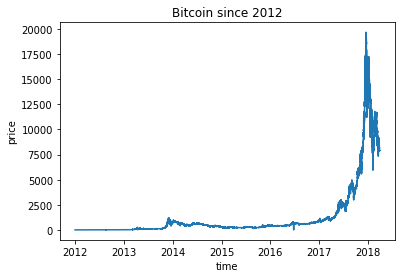

In [46]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(btc_df["Date"], btc_df["Close"])
ax.set_title("Bitcoin since 2012")
ax.set(ylabel="price",xlabel="time")
plt.show();

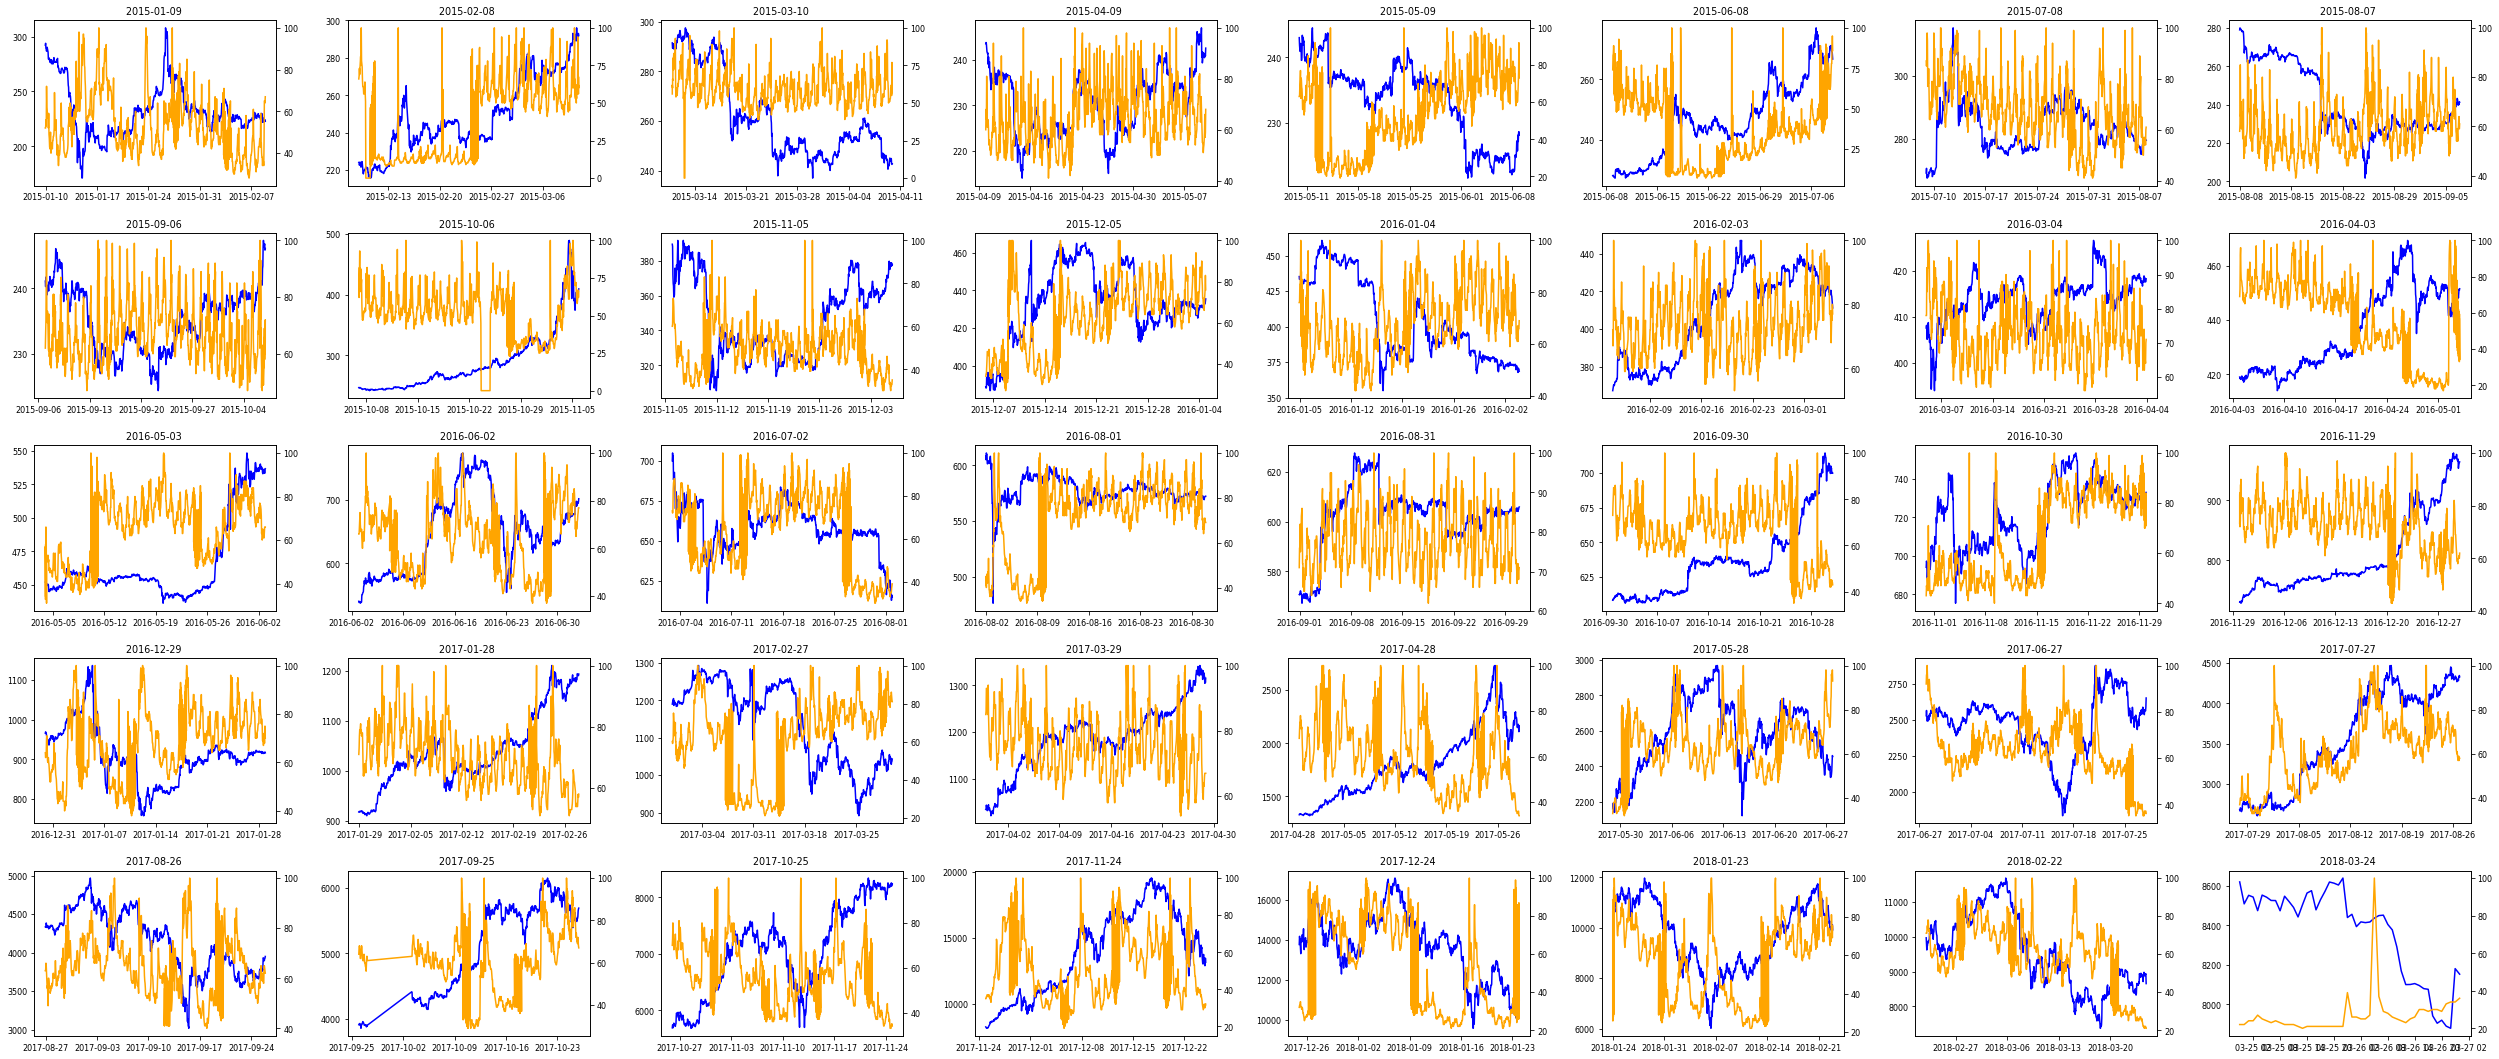

In [60]:
from sklearn import preprocessing

btc_and_trends_df_hourly = pd.merge(left=btc_df, left_on="Timestamp", right=google_trends_df, right_on="Timestamp")
min_max_scaler=preprocessing.MinMaxScaler()
#change so that it just creates a new column

# btc_and_trends_df_hourly[['close_normalized','bitcoin_normalized']] = btc_and_trends_df_hourly[['Close','Bitcoin']]

# btc_and_trends_df_hourly[['close_normalized','bitcoin_normalized']] = min_max_scaler.fit_transform(btc_and_trends_df_hourly[['close_normalized','bitcoin_normalized']])
# btc_and_trends_df_hourly.head()

# fig, ax = plt.subplots()
# ax.plot(btc_and_trends_df_hourly["Date"], btc_and_trends_df_hourly["close_normalized"])
# ax.plot(btc_and_trends_df_hourly["Date"], btc_and_trends_df_hourly["bitcoin_normalized"])
# ax.set_title("Bitcoin Close Prices and Google Trends Normalized")
# ax.set(ylabel="price and trend, scaled to 0-1",xlabel="time")
# plt.show()

fig, axes = plt.subplots(nrows=5, ncols=8, figsize=(35,15), sharex=False, sharey=False)

start_timestamp = btc_and_trends_df_hourly["Timestamp"][0] 
end_timestamp = btc_and_trends_df_hourly["Timestamp"].iloc[-1] 

for i, ax in enumerate(axes.flatten()):
    in_range_df = btc_and_trends_df_hourly[ (btc_and_trends_df_hourly["Timestamp"] > start_timestamp) & (btc_and_trends_df_hourly["Timestamp"] <= start_timestamp+2592000) ]
    ax.plot(in_range_df["Date"], in_range_df["Close"], color='blue')
    ax2 = ax.twinx() 
    ax2.plot(in_range_df["Date"], in_range_df["Bitcoin"], color='orange' )
    ax.set_title(str(in_range_df["Date"].iloc[0])[:-8])
    start_timestamp += 2592000
    
plt.rcParams.update({'font.size': 16})
fig.tight_layout()
plt.show();

# Orange is Google Trends Hourly Data for the keyword 'Bitcoin'
# Blue is Bitcoin Hourly Close Data 

In [77]:
from luminol.anomaly_detector import AnomalyDetector 
from luminol.correlator import Correlator

# Convert dataframe into dictionary to put into luminol
timestamp_close_df = btc_and_trends_df_hourly[['Timestamp', 'Close']]
timestamp_bitcoin_trend_df = btc_and_trends_df_hourly[['Timestamp', 'Bitcoin']]
display(timestamp_close_df.head())
display(timestamp_bitcoin_trend_df.head())

timestamp_close_dict = timestamp_close_df.set_index('Timestamp')['Close'].to_dict()
timestamp_bitcoin_trend_dict = timestamp_bitcoin_trend_df.set_index('Timestamp')['Bitcoin'].to_dict()

# anomaly detector 
anomaly_detector = AnomalyDetector(timestamp_close_dict)
score = anomaly_detector.get_all_scores()

for timestamp, value in score.iteritems():
    # print anomaly score if greater than 0 
    if (value > 0 ):
        readable_date = datetime.fromtimestamp(timestamp).strftime('%Y-%m-%d %H')
        print(readable_date,'->', value)
    
# correlate Close price and Google Trends
anomalies = anomaly_detector.get_anomalies()
for anomaly in anomalies:
    time_period = anomaly.get_time_window()
    
    # to do: tweek the parameters for correlator (like the shift allowed)
    correlator = Correlator(timestamp_close_dict, timestamp_bitcoin_trend_dict, time_period)
    if correlator.is_correlated(threshold=0.5):
        print("Trend data correlate with Price at time period (%d, %d)" % time_period)



,Timestamp,Close
0,1420840800,289.13
1,1420844400,292.15
2,1420848000,293.89
3,1420851600,289.10
4,1420855200,288.59


,Timestamp,Bitcoin
0,1420840800,53
1,1420844400,52
2,1420848000,52
3,1420851600,56
4,1420855200,53


2017-10-04 03 -> 86.0
2017-10-04 04 -> 114.0
2017-10-04 05 -> 146.0
2017-10-04 06 -> 182.0
2017-10-04 07 -> 222.0
2017-10-04 08 -> 266.0
2017-10-04 09 -> 314.0
2017-10-04 10 -> 366.0
2017-10-04 11 -> 422.0
2017-10-04 12 -> 482.0
2017-10-04 13 -> 546.0
2017-10-04 14 -> 614.0
2017-10-04 15 -> 686.0
2017-10-04 16 -> 762.0
2017-10-04 17 -> 842.0
2017-10-04 18 -> 926.0
2017-10-04 19 -> 1014.0
2017-10-04 20 -> 1106.0
2017-10-04 21 -> 1202.0
2017-10-04 22 -> 1302.0
2017-10-04 23 -> 1406.0
2017-10-05 00 -> 1514.0
2017-10-05 01 -> 1626.0
2017-10-05 02 -> 1742.0
2017-10-05 03 -> 1862.0
2017-10-05 04 -> 1986.0
2017-10-05 05 -> 2114.0
2017-10-05 06 -> 2246.0
2017-10-05 07 -> 2382.0
2017-10-05 08 -> 2522.0
2017-10-05 09 -> 2666.0
2017-10-05 10 -> 2814.0
2017-10-05 11 -> 2966.0
2017-10-05 12 -> 3122.0
2017-10-05 13 -> 3282.0
2017-10-05 14 -> 3446.0
2017-10-05 15 -> 3614.0
2017-10-05 16 -> 3786.0
2017-10-05 17 -> 3962.0
2017-10-05 18 -> 4142.0
2017-10-05 19 -> 4326.0
2017-10-05 20 -> 4514.0
2017-10-0

2017-10-20 04 -> 114.0
2017-10-20 05 -> 86.0
2017-11-20 06 -> 94.0
2017-11-20 07 -> 122.0
2017-11-20 08 -> 154.0
2017-11-20 09 -> 190.0
2017-11-20 10 -> 230.0
2017-11-20 11 -> 274.0
2017-11-20 12 -> 322.0
2017-11-20 13 -> 374.0
2017-11-20 14 -> 430.0
2017-11-20 15 -> 490.0
2017-11-20 16 -> 554.0
2017-11-20 17 -> 622.0
2017-11-20 18 -> 694.0
2017-11-20 19 -> 770.0
2017-11-20 20 -> 850.0
2017-11-20 21 -> 934.0
2017-11-20 22 -> 1022.0
2017-11-20 23 -> 1114.0
2017-11-21 00 -> 1210.0
2017-11-21 01 -> 1310.0
2017-11-21 02 -> 1414.0
2017-11-21 03 -> 1522.0
2017-11-21 04 -> 1634.0
2017-11-21 05 -> 1750.0
2017-11-21 06 -> 1870.0
2017-11-21 07 -> 1994.0
2017-11-21 08 -> 2064.0
2017-11-21 09 -> 2138.0
2017-11-21 10 -> 2270.0
2017-11-21 11 -> 2406.0
2017-11-21 12 -> 2486.0
2017-11-21 13 -> 2570.0
2017-11-21 14 -> 2714.0
2017-11-21 15 -> 2862.0
2017-11-21 16 -> 3014.0
2017-11-21 17 -> 3170.0
2017-11-21 18 -> 3330.0
2017-11-21 19 -> 3494.0
2017-11-21 20 -> 3662.0
2017-11-21 21 -> 3834.0
2017-11-21 2

2017-12-17 18 -> 6998.0
2017-12-17 19 -> 7130.0
2017-12-17 20 -> 7370.0
2017-12-17 21 -> 7614.0
2017-12-17 22 -> 7862.0
2017-12-17 23 -> 8114.0
2017-12-18 00 -> 8370.0
2017-12-18 01 -> 8630.0
2017-12-18 02 -> 8894.0
2017-12-18 03 -> 9162.0
2017-12-18 04 -> 9434.0
2017-12-18 05 -> 9710.0
2017-12-18 06 -> 9990.0
2017-12-18 07 -> 10274.0
2017-12-18 08 -> 10562.0
2017-12-18 09 -> 10854.0
2017-12-18 10 -> 11150.0
2017-12-18 11 -> 11450.0
2017-12-18 12 -> 11754.0
2017-12-18 13 -> 12062.0
2017-12-18 14 -> 12374.0
2017-12-18 15 -> 12690.0
2017-12-18 16 -> 13010.0
2017-12-18 17 -> 13186.0
2017-12-18 18 -> 13186.0
2017-12-18 19 -> 13186.0
2017-12-18 20 -> 13186.0
2017-12-18 21 -> 13186.0
2017-12-18 22 -> 13186.0
2017-12-18 23 -> 13186.0
2017-12-19 00 -> 13186.0
2017-12-19 01 -> 13366.0
2017-12-19 02 -> 13694.0
2017-12-19 03 -> 13878.0
2017-12-19 04 -> 13878.0
2017-12-19 05 -> 13878.0
2017-12-19 06 -> 13878.0
2017-12-19 07 -> 13878.0
2017-12-19 08 -> 13878.0
2017-12-19 09 -> 14066.0
2017-12-19 10

2018-01-15 18 -> 4544.0
2018-01-15 19 -> 4358.0
2018-01-15 20 -> 4176.0
2018-01-15 21 -> 3998.0
2018-01-15 22 -> 3824.0
2018-01-15 23 -> 3654.0
2018-01-16 00 -> 3488.0
2018-01-16 01 -> 3326.0
2018-01-16 02 -> 3168.0
2018-01-16 03 -> 3014.0
2018-01-16 04 -> 2864.0
2018-01-16 05 -> 2718.0
2018-01-16 06 -> 2576.0
2018-01-16 07 -> 2438.0
2018-01-16 08 -> 2304.0
2018-01-16 09 -> 2174.0
2018-01-16 10 -> 2048.0
2018-01-16 11 -> 1926.0
2018-01-16 12 -> 1808.0
2018-01-16 13 -> 1694.0
2018-01-16 14 -> 1584.0
2018-01-16 15 -> 1478.0
2018-01-16 16 -> 1376.0
2018-01-16 17 -> 1278.0
2018-01-16 18 -> 1210.0
2018-01-16 19 -> 1210.0
2018-01-16 20 -> 1146.0
2018-01-16 21 -> 1056.0
2018-01-16 22 -> 970.0
2018-01-16 23 -> 888.0
2018-01-17 00 -> 810.0
2018-01-17 01 -> 736.0
2018-01-17 02 -> 684.0
2018-01-17 03 -> 636.0
2018-01-17 04 -> 570.0
2018-01-17 05 -> 508.0
2018-01-17 06 -> 450.0
2018-01-17 07 -> 396.0
2018-01-17 08 -> 346.0
2018-01-17 09 -> 300.0
2018-01-17 10 -> 280.0
2018-01-17 11 -> 290.0
2018-0

2018-02-18 14 -> 10226.0
2018-02-18 15 -> 9942.0
2018-02-18 16 -> 9662.0
2018-02-18 17 -> 9386.0
2018-02-18 18 -> 9114.0
2018-02-18 19 -> 8846.0
2018-02-18 20 -> 8582.0
2018-02-18 21 -> 8322.0
2018-02-18 22 -> 8066.0
2018-02-18 23 -> 7814.0
2018-02-19 00 -> 7566.0
2018-02-19 01 -> 7322.0
2018-02-19 02 -> 7082.0
2018-02-19 03 -> 6846.0
2018-02-19 04 -> 6614.0
2018-02-19 05 -> 6386.0
2018-02-19 06 -> 6162.0
2018-02-19 07 -> 5942.0
2018-02-19 08 -> 5726.0
2018-02-19 09 -> 5514.0
2018-02-19 10 -> 5306.0
2018-02-19 11 -> 5102.0
2018-02-19 12 -> 4902.0
2018-02-19 13 -> 4706.0
2018-02-19 14 -> 4514.0
2018-02-19 15 -> 4326.0
2018-02-19 16 -> 4142.0
2018-02-19 17 -> 3962.0
2018-02-19 18 -> 3786.0
2018-02-19 19 -> 3614.0
2018-02-19 20 -> 3446.0
2018-02-19 21 -> 3282.0
2018-02-19 22 -> 3122.0
2018-02-19 23 -> 2966.0
2018-02-20 00 -> 2814.0
2018-02-20 01 -> 2666.0
2018-02-20 02 -> 2522.0
2018-02-20 03 -> 2382.0
2018-02-20 04 -> 2246.0
2018-02-20 05 -> 2114.0
2018-02-20 06 -> 1986.0
2018-02-20 07 -

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,date,Bitcoin,Ethereum,Ripple,Buy Bitcoin,Coinbase,isPartial
27286,1507402800,4345.16,4345.94,4344.00,4345.90,11.259504,48919.885924,4344.763724,2017-10-07 19:00:00,2017-10-07 15:00:00,51,8,6,2,3,False
27287,1507406400,4338.97,4338.98,4333.00,4338.92,0.150278,651.948943,4338.282820,2017-10-07 20:00:00,2017-10-07 16:00:00,51,8,6,1,3,False
27288,1507410000,4332.00,4336.00,4332.00,4336.00,15.763021,68314.313562,4333.833694,2017-10-07 21:00:00,2017-10-07 17:00:00,52,8,6,2,3,False
27289,1507413600,4336.40,4336.40,4335.78,4335.78,0.064000,277.504205,4336.003200,2017-10-07 22:00:00,2017-10-07 18:00:00,52,8,6,2,4,False
27290,1507417200,4448.98,4450.88,4448.98,4450.88,56.035524,249350.160610,4449.858648,2017-10-07 23:00:00,2017-10-07 19:00:00,52,8,6,2,3,False
27291,1507420800,4422.72,4438.86,4422.28,4430.95,27.605597,122350.376990,4432.085829,2017-10-08 00:00:00,2017-10-07 20:00:00,53,8,6,2,4,False
27292,1507424400,4444.22,4444.22,4433.99,4433.99,8.862144,39355.691056,4440.877055,2017-10-08 01:00:00,2017-10-07 21:00:00,56,9,8,2,4,False
27293,1507428000,4441.99,4442.16,4430.52,4430.52,9.123564,40512.061137,4440.376714,2017-10-08 02:00:00,2017-10-07 22:00:00,58,9,8,2,4,False
27294,1507431600,4435.46,4435.46,4435.46,4435.46,0.209151,927.680007,4435.460000,2017-10-08 03:00:00,2017-10-07 23:00:00,62,9,7,2,4,False
27295,1507435200,4439.84,4440.69,4431.53,4431.57,1.153514,5118.796366,4437.569458,2017-10-08 04:00:00,2017-10-08 00:00:00,59,8,7,2,4,False


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,date,Bitcoin,Ethereum,Ripple,Buy Bitcoin,Coinbase,isPartial
28606,1511553600,8215.00,8215.00,8198.05,8198.05,14.029876,115149.728860,8207.466129,2017-11-24 20:00:00,2017-11-24 15:00:00,35,10,3,1,3,False
28607,1511557200,8218.29,8234.94,8216.33,8234.52,2.864984,23566.519998,8225.708631,2017-11-24 21:00:00,2017-11-24 16:00:00,35,10,3,1,3,False
28608,1511560800,8240.24,8244.37,8237.90,8237.90,0.439599,3622.902068,8241.387854,2017-11-24 22:00:00,2017-11-24 17:00:00,34,11,3,1,3,False
28609,1511564400,8253.83,8253.83,8243.44,8243.44,0.587358,4847.721297,8253.438189,2017-11-24 23:00:00,2017-11-24 18:00:00,35,9,3,1,3,False
28610,1511568000,8199.83,8199.83,8194.15,8194.15,0.549580,4504.435045,8196.138981,2017-11-25 00:00:00,2017-11-24 19:00:00,35,9,3,1,3,False
28611,1511571600,8165.10,8165.10,8165.09,8165.10,0.798786,6522.160715,8165.090193,2017-11-25 01:00:00,2017-11-24 20:00:00,36,9,3,1,3,False
28612,1511575200,8138.91,8138.91,8125.00,8135.99,9.747267,79215.329595,8126.927596,2017-11-25 02:00:00,2017-11-24 21:00:00,36,9,3,1,3,False
28613,1511578800,8161.00,8161.00,8161.00,8161.00,1.663381,13574.852912,8161.000000,2017-11-25 03:00:00,2017-11-24 22:00:00,37,9,3,1,3,False
28614,1511582400,8150.00,8150.00,8149.32,8149.33,0.175264,1428.332556,8149.620938,2017-11-25 04:00:00,2017-11-24 23:00:00,37,12,3,2,4,False
28615,1511586000,8187.80,8194.40,8182.70,8182.70,1.292921,10586.880651,8188.343594,2017-11-25 05:00:00,2017-11-25 00:00:00,37,12,4,2,4,False


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,date,Bitcoin,Ethereum,Ripple,Buy Bitcoin,Coinbase,isPartial
28873,1512428400,11475.12,11493.32,11450.13,11450.13,2.917647,33429.072061,11457.545405,2017-12-04 23:00:00,2017-12-04 18:00:00,42,4,2,2,3,False
28874,1512432000,11613.07,11629.00,11613.02,11629.00,25.572168,297043.060100,11615.873381,2017-12-05 00:00:00,2017-12-04 19:00:00,41,4,2,2,3,False
28875,1512435600,11578.92,11609.83,11578.92,11609.79,1.340500,15550.442043,11600.479996,2017-12-05 01:00:00,2017-12-04 20:00:00,43,4,2,2,4,False
28876,1512439200,11556.75,11567.62,11556.75,11567.62,0.311235,3597.317698,11558.216498,2017-12-05 02:00:00,2017-12-04 21:00:00,45,5,3,2,4,False
28877,1512442800,11522.57,11546.77,11513.40,11546.77,6.695710,77229.601110,11534.192030,2017-12-05 03:00:00,2017-12-04 22:00:00,48,5,3,2,4,False
28878,1512446400,11579.05,11599.00,11579.05,11599.00,0.435887,5050.164416,11585.935664,2017-12-05 04:00:00,2017-12-04 23:00:00,51,5,3,2,4,False
28879,1512450000,11494.64,11499.75,11494.64,11499.75,0.017080,196.391537,11498.185448,2017-12-05 05:00:00,2017-12-05 00:00:00,45,4,3,2,4,False
28880,1512450000,11494.64,11499.75,11494.64,11499.75,0.017080,196.391537,11498.185448,2017-12-05 05:00:00,2017-12-05 00:00:00,26,2,1,1,2,False
28881,1512453600,11499.55,11499.73,11499.55,11499.73,0.043911,504.960324,11499.723288,2017-12-05 06:00:00,2017-12-05 01:00:00,43,4,2,2,4,False
28882,1512453600,11499.55,11499.73,11499.55,11499.73,0.043911,504.960324,11499.723288,2017-12-05 06:00:00,2017-12-05 01:00:00,24,2,1,1,2,False


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,date,Bitcoin,Ethereum,Ripple,Buy Bitcoin,Coinbase,isPartial
29305,1513735200,16474.99,16480.52,16431.59,16478.03,11.994848,1.975540e+05,16469.906238,2017-12-20 02:00:00,2017-12-19 21:00:00,100,10,13,3,12,False
29306,1513735200,16474.99,16480.52,16431.59,16478.03,11.994848,1.975540e+05,16469.906238,2017-12-20 02:00:00,2017-12-19 21:00:00,51,5,6,2,6,False
29307,1513738800,17195.13,17195.13,17182.49,17183.00,17.291245,2.972439e+05,17190.429058,2017-12-20 03:00:00,2017-12-19 22:00:00,91,10,12,3,11,False
29308,1513738800,17195.13,17195.13,17182.49,17183.00,17.291245,2.972439e+05,17190.429058,2017-12-20 03:00:00,2017-12-19 22:00:00,46,5,6,2,6,False
29309,1513742400,16865.38,16866.36,16813.03,16813.03,25.126671,4.234597e+05,16852.997539,2017-12-20 04:00:00,2017-12-19 23:00:00,84,9,12,3,10,False
29310,1513742400,16865.38,16866.36,16813.03,16813.03,25.126671,4.234597e+05,16852.997539,2017-12-20 04:00:00,2017-12-19 23:00:00,43,5,6,2,5,False
29311,1513746000,16954.52,17037.57,16954.52,17036.00,2.342351,3.977898e+04,16982.500090,2017-12-20 05:00:00,2017-12-20 00:00:00,70,5,7,2,14,False
29312,1513749600,16522.27,16522.27,16439.53,16439.58,27.016713,4.452990e+05,16482.352087,2017-12-20 06:00:00,2017-12-20 01:00:00,85,4,8,4,19,False
29313,1513753200,16400.00,16469.90,16400.00,16420.23,2.900145,4.774844e+04,16464.159896,2017-12-20 07:00:00,2017-12-20 02:00:00,73,4,8,3,16,False
29314,1513756800,16521.95,16521.99,16490.00,16490.01,4.510723,7.442822e+04,16500.285916,2017-12-20 08:00:00,2017-12-20 03:00:00,58,4,7,2,11,False


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,date,Bitcoin,Ethereum,Ripple,Buy Bitcoin,Coinbase,isPartial
29622,1514779200,13481.73,13497.56,13462.50,13470.00,3.743944,50433.983747,13470.816120,2018-01-01 04:00:00,2017-12-31 23:00:00,56,5,23,2,8,False
29623,1514782800,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479,2018-01-01 05:00:00,2018-01-01 00:00:00,57,5,23,2,7,False
29624,1514786400,13569.36,13569.36,13540.34,13568.81,0.378167,5121.202552,13542.165536,2018-01-01 06:00:00,2018-01-01 01:00:00,58,5,23,2,7,False
29625,1514790000,13863.32,13890.49,13850.00,13850.00,1.087290,15082.081022,13871.259731,2018-01-01 07:00:00,2018-01-01 02:00:00,58,5,23,2,7,False
29626,1514793600,13660.56,13660.63,13634.14,13660.63,1.884282,25734.165444,13657.282213,2018-01-01 08:00:00,2018-01-01 03:00:00,58,5,23,2,7,False
29627,1514797200,13499.90,13499.90,13460.18,13499.90,1.210573,16302.968032,13467.144986,2018-01-01 09:00:00,2018-01-01 04:00:00,56,5,22,2,6,False
29628,1514800800,13618.78,13618.81,13555.71,13555.71,0.220720,2995.505142,13571.535654,2018-01-01 10:00:00,2018-01-01 05:00:00,56,5,22,2,6,False
29629,1514804400,13596.36,13596.36,13540.10,13592.83,0.272697,3694.819491,13549.153068,2018-01-01 11:00:00,2018-01-01 06:00:00,56,5,22,2,6,False
29630,1514808000,13303.28,13348.45,13303.28,13348.45,2.914161,38891.453759,13345.678165,2018-01-01 12:00:00,2018-01-01 07:00:00,55,5,20,2,5,False
29631,1514811600,13318.54,13318.54,13266.67,13273.36,0.861305,11440.220305,13282.429678,2018-01-01 13:00:00,2018-01-01 08:00:00,55,5,20,1,5,False


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,date,Bitcoin,Ethereum,Ripple,Buy Bitcoin,Coinbase,isPartial
29820,1515405600,15164.00,15172.91,15156.00,15156.00,21.774390,330035.400210,15157.044892,2018-01-08 10:00:00,2018-01-08 05:00:00,81,26,45,3,12,False
29821,1515409200,15359.26,15359.26,15313.23,15351.33,1.845665,28306.577460,15336.787437,2018-01-08 11:00:00,2018-01-08 06:00:00,76,22,43,3,11,False
29822,1515412800,15459.99,15460.00,15448.97,15459.99,7.733512,119515.062210,15454.176002,2018-01-08 12:00:00,2018-01-08 07:00:00,71,21,40,2,10,False
29823,1515416400,15352.72,15370.00,15343.46,15370.00,11.013291,169061.094730,15350.642402,2018-01-08 13:00:00,2018-01-08 08:00:00,70,17,35,2,10,False
29824,1515420000,14879.90,14880.00,14827.39,14880.00,5.524118,81967.670732,14838.147207,2018-01-08 14:00:00,2018-01-08 09:00:00,69,15,36,2,10,False
29825,1515423600,14372.77,14400.00,14338.36,14380.00,15.126850,217298.826570,14365.107626,2018-01-08 15:00:00,2018-01-08 10:00:00,69,14,33,2,10,False
29826,1515427200,14500.00,14613.25,14496.12,14600.00,9.730031,141375.701200,14529.830486,2018-01-08 16:00:00,2018-01-08 11:00:00,70,14,32,2,10,False
29827,1515430800,14841.11,14915.67,14841.11,14868.80,4.088862,60813.814572,14873.042097,2018-01-08 17:00:00,2018-01-08 12:00:00,69,14,34,2,9,False
29828,1515434400,14864.99,14864.99,14803.54,14815.74,2.417532,35806.002537,14810.974603,2018-01-08 18:00:00,2018-01-08 13:00:00,75,14,38,2,10,False
29829,1515438000,14949.90,14960.04,14949.69,14950.57,6.730292,100651.036260,14954.928435,2018-01-08 19:00:00,2018-01-08 14:00:00,86,15,49,2,11,False


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,date,Bitcoin,Ethereum,Ripple,Buy Bitcoin,Coinbase,isPartial
30354,1517068800,11500.99,11502.35,11465.01,11465.03,52.039093,598375.876270,11498.583810,2018-01-27 16:00:00,2018-01-27 11:00:00,57,7,9,1,3,False
30355,1517072400,11556.00,11556.00,11555.00,11555.00,80.977823,935699.081630,11555.004127,2018-01-27 17:00:00,2018-01-27 12:00:00,57,7,10,1,4,False
30356,1517076000,11449.68,11482.44,11430.00,11471.74,25.171142,288265.616840,11452.226501,2018-01-27 18:00:00,2018-01-27 13:00:00,57,7,10,1,4,False
30357,1517079600,11427.02,11450.00,11426.92,11430.10,1.341854,15335.633375,11428.687603,2018-01-27 19:00:00,2018-01-27 14:00:00,58,7,10,1,4,False
30358,1517083200,11465.04,11519.96,11465.04,11519.96,22.684798,260846.645990,11498.742255,2018-01-27 20:00:00,2018-01-27 15:00:00,59,7,10,1,5,False
30359,1517086800,11510.12,11521.36,11498.32,11502.80,7.261678,83529.780804,11502.821252,2018-01-27 21:00:00,2018-01-27 16:00:00,61,8,10,1,5,False
30360,1517090400,11553.46,11553.60,11551.00,11551.48,4.150519,47948.741850,11552.468916,2018-01-27 22:00:00,2018-01-27 17:00:00,62,8,11,1,5,False
30361,1517094000,11476.99,11497.75,11466.49,11497.75,1.255630,14424.944842,11488.212413,2018-01-27 23:00:00,2018-01-27 18:00:00,62,8,10,1,5,False
30362,1517097600,11446.54,11449.90,11437.73,11449.90,3.382675,38707.688449,11442.921962,2018-01-28 00:00:00,2018-01-27 19:00:00,63,8,10,2,5,False
30363,1517101200,11493.79,11493.79,11482.43,11490.68,0.480430,5520.307566,11490.355698,2018-01-28 01:00:00,2018-01-27 20:00:00,67,9,11,2,6,False


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,date,Bitcoin,Ethereum,Ripple,Buy Bitcoin,Coinbase,isPartial
30752,1518328800,8120.04,8131.66,8103.11,8103.11,12.728064,103483.080450,8130.308272,2018-02-11 06:00:00,2018-02-11 01:00:00,26,2,4,1,2,False
30753,1518332400,8064.22,8066.55,8055.01,8055.01,6.334003,51054.651464,8060.408348,2018-02-11 07:00:00,2018-02-11 02:00:00,25,2,4,1,2,False
30754,1518336000,7942.97,7942.97,7904.80,7920.00,25.688725,203435.949650,7919.269927,2018-02-11 08:00:00,2018-02-11 03:00:00,27,3,4,1,2,False
30755,1518339600,7913.13,7938.29,7913.13,7938.29,0.409918,3244.489383,7914.966327,2018-02-11 09:00:00,2018-02-11 04:00:00,27,3,4,1,2,False
30756,1518343200,8120.00,8130.01,8091.00,8091.00,23.741636,192359.921500,8102.218451,2018-02-11 10:00:00,2018-02-11 05:00:00,28,3,4,1,1,False
30757,1518346800,7981.15,8000.81,7981.15,8000.81,0.439761,3513.528787,7989.633792,2018-02-11 11:00:00,2018-02-11 06:00:00,27,3,4,1,1,False
30758,1518350400,8192.61,8199.00,8170.03,8199.00,8.320533,68128.234548,8187.964912,2018-02-11 12:00:00,2018-02-11 07:00:00,27,3,4,0,1,False
30759,1518354000,8284.00,8284.00,8265.53,8265.61,1.240681,10255.908731,8266.354443,2018-02-11 13:00:00,2018-02-11 08:00:00,27,3,4,0,1,False
30760,1518357600,8268.00,8268.05,8260.11,8268.05,13.216168,109232.003930,8265.028293,2018-02-11 14:00:00,2018-02-11 09:00:00,25,3,4,0,1,False
30761,1518361200,8455.00,8457.00,8429.50,8430.01,8.856799,74691.175936,8433.202434,2018-02-11 15:00:00,2018-02-11 10:00:00,23,2,4,0,1,False


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,date,Bitcoin,Ethereum,Ripple,Buy Bitcoin,Coinbase,isPartial
31353,1520233200,11539.10,11539.10,11528.02,11528.02,1.302091,1.501446e+04,11531.040223,2018-03-05 07:00:00,2018-03-05 02:00:00,71,8,16,2,8,False
31354,1520236800,11515.04,11532.38,11510.01,11510.01,12.280570,1.414276e+05,11516.372582,2018-03-05 08:00:00,2018-03-05 03:00:00,75,9,16,2,7,False
31355,1520240400,11442.03,11449.67,11425.41,11447.00,1.719721,1.967976e+04,11443.579148,2018-03-05 09:00:00,2018-03-05 04:00:00,77,9,16,1,7,False
31356,1520244000,11437.00,11450.00,11433.01,11434.00,1.198660,1.371044e+04,11438.146066,2018-03-05 10:00:00,2018-03-05 05:00:00,77,9,17,2,7,False
31357,1520247600,11490.65,11493.90,11480.00,11493.90,0.419751,4.821879e+03,11487.464591,2018-03-05 11:00:00,2018-03-05 06:00:00,75,9,19,1,7,False
31358,1520251200,11499.95,11514.99,11493.50,11514.97,4.361065,5.017585e+04,11505.412267,2018-03-05 12:00:00,2018-03-05 07:00:00,72,9,27,1,9,False
31359,1520254800,11542.00,11542.97,11541.05,11541.77,2.894443,3.340598e+04,11541.418652,2018-03-05 13:00:00,2018-03-05 08:00:00,76,9,25,1,8,False
31360,1520258400,11519.16,11519.32,11513.48,11514.44,2.851086,3.283158e+04,11515.466942,2018-03-05 14:00:00,2018-03-05 09:00:00,68,9,21,1,7,False
31361,1520262000,11479.70,11489.00,11474.48,11489.00,2.801414,3.216618e+04,11482.125528,2018-03-05 15:00:00,2018-03-05 10:00:00,67,8,19,1,7,False
31362,1520265600,11500.30,11500.30,11500.30,11500.30,0.035000,4.025105e+02,11500.300000,2018-03-05 16:00:00,2018-03-05 11:00:00,69,8,18,1,8,False


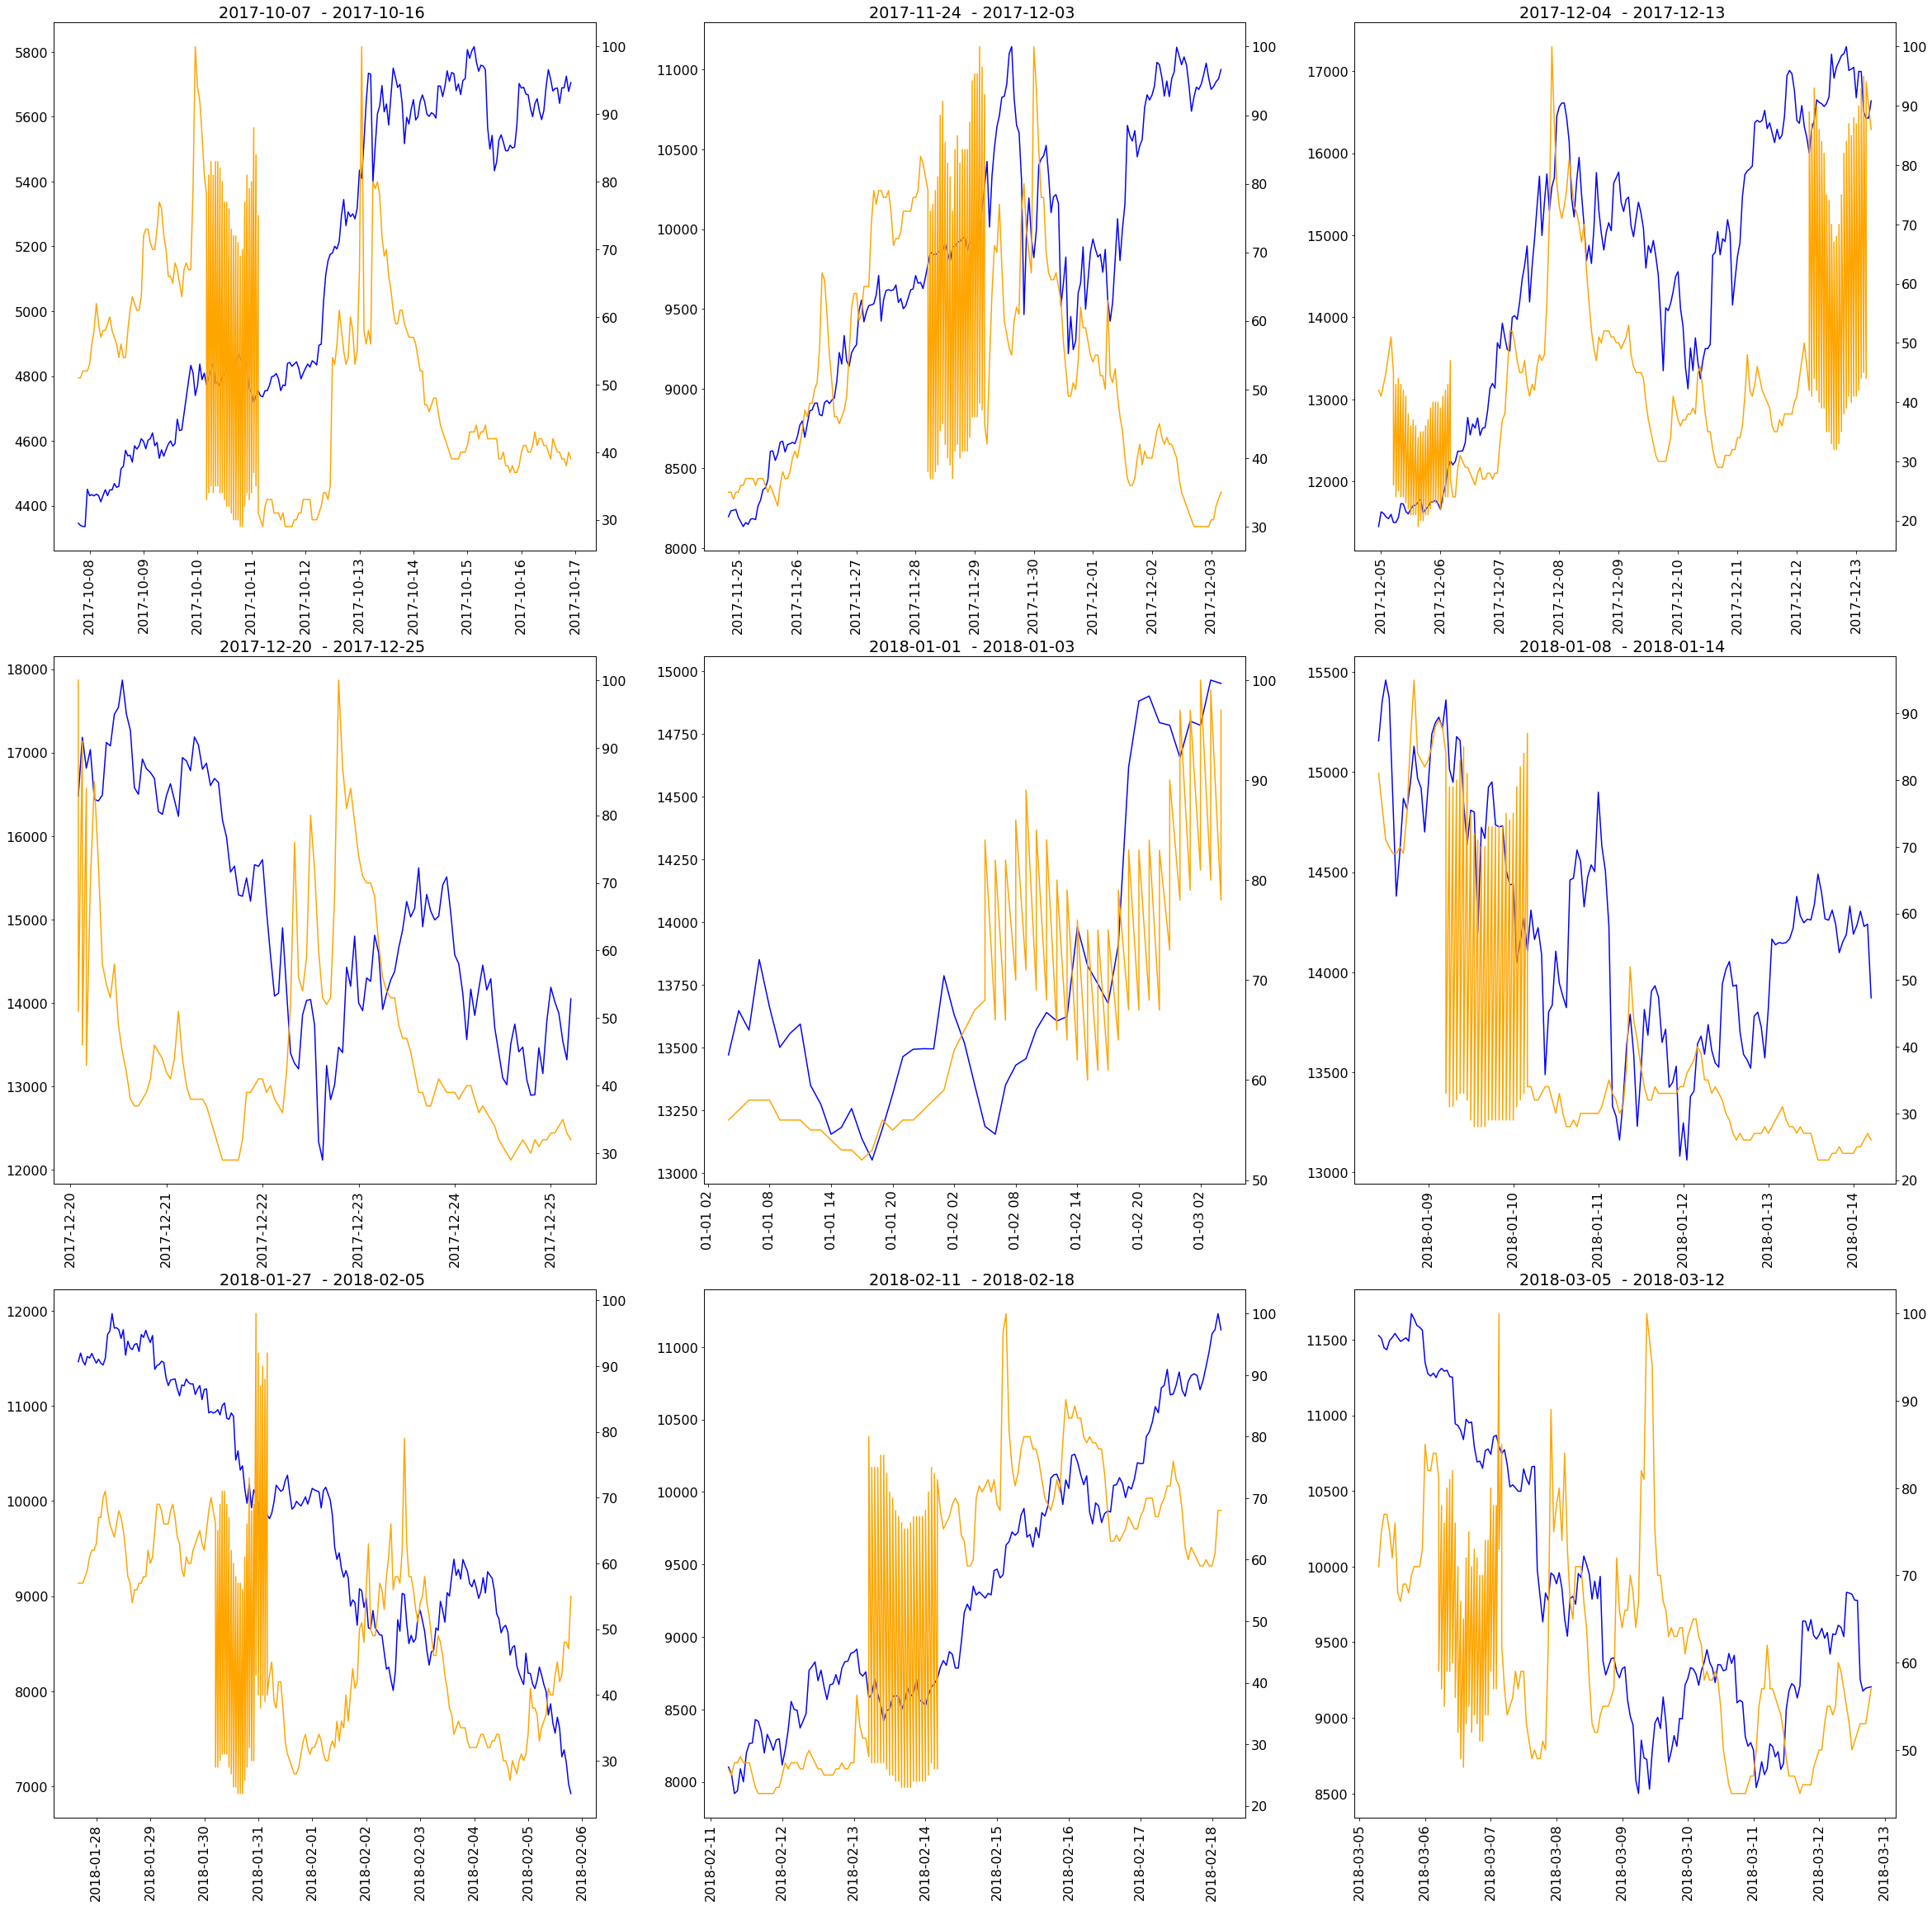

In [94]:
fig2, axes2 = plt.subplots(nrows=3, ncols=3, figsize=(40,40), sharex=False, sharey=False)

#for i, anomaly in enumerate(anomalies):
for i, ax in enumerate(axes2.flatten()):    
    time_period = anomalies[i].get_time_window()
    start_timestamp = time_period[0]
    end_timestamp = time_period[1] 
        
    in_range_df = btc_and_trends_df_hourly[ (btc_and_trends_df_hourly["Timestamp"] > start_timestamp) & (btc_and_trends_df_hourly["Timestamp"] <= end_timestamp) ]
    
    display(in_range_df)
    
    ax.plot(in_range_df["Date"], in_range_df["Close"], color='blue')
    ax2 = ax.twinx() 
    ax2.plot(in_range_df["Date"], in_range_df["Bitcoin"], color='orange' )
    ax.set_title(str(in_range_df["Date"].iloc[0])[:-8] + ' - ' + str(in_range_df["Date"].iloc[-1])[:-8] )
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    
fig.tight_layout()
fig.subplots_adjust(hspace=2)
plt.show();

# Blue is Price, Orange is Trends

In [ ]:
# to do: find out when google trend data had anomalies 